<a href="https://colab.research.google.com/github/prathikksha/Image-classification/blob/main/Image_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data: Images
#use python to scrape images from bing


In [7]:
!pip install ipython-autotime
%load_ext autotime

time: 210 µs (started: 2021-05-19 09:57:50 +00:00)


In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images 

In [3]:
from bing_image_downloader import downloader
downloader.download("cute dog",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.recreoviral.com/wp-content/uploads/2015/08/Fotografías-de-perros-con-sus-cachorros-14.jpg
[!] Issue getting: https://www.recreoviral.com/wp-content/uploads/2015/08/Fotografías-de-perros-con-sus-cachorros-14.jpg
[!] Error:: 'ascii' codec can't encode character '\xed' in position 40: ordinal not in range(128)
[%] Downloading Image #1 from https://buzzsharer.com/wp-content/uploads/2015/04/beautiful-duchshund.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.barnorama.com/wp-content/galleries/01/chewbacca/13.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapershome.com/images/wallpapers/puppy-2160x3840-kitten-funny-animals-5k-15330.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://hative.com/wp-content/uploads/2014/10/cool-pet-costumes/9-cool-pet-costumes.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.heartsofpets.

In [5]:
from bing_image_downloader import downloader
downloader.download("pretty sunflowers",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/--ShcPhgDlI8/UfOJYMdoxMI/AAAAAAAAG_0/pkfkiw2YE88/s1600/beautiful+Sun+flower+(9).jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://wohhwedding.com/wp-content/uploads/2016/05/Sunflower-Wedding-Cup-Cake-Decorating-Ideas.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/a8/0f/84/a80f847e6275945f8b86adc844a57cdc--field-of-sunflowers-beautiful-sunrise.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.tattoosbag.com/wp-content/uploads/2016/09/Sunflower-Tattoo-Shoulder-For-Women.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://wohhwedding.com/wp-content/uploads/2016/05/Country-Sunflower-Wedding-Decorations.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://i.123g.us/c/birth_flowers/card/331312.gif
[%] File Downloaded !

[%] Downloading Image #7 from https://www.bing.com/th/id/OGC.e769ff0243

In [14]:
#preprocessing

import os #to move from one folder to another
import matplotlib.pyplot as plt #displaying the image
import numpy as np #numerical computing
from skimage.io import imread #reading the image
from skimage.transform import resize #resize the image

target = [] #for output
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['cute dog','pretty sunflowers']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #label encoding the values
  path = os.path.join(DATADIR,category) #create path to use the images
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resize = resize(img_array,(150,150,3))  #resize image #normalises the pixel values from 0-1
    flat_data.append(img_resize.flatten()) #flatten image
    images.append(img_resize)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images) 

#split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state=109)

#split data into Training and testing
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [16]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.75

In [21]:
confusion_matrix(y_pred,y_test)

array([[6, 2],
       [1, 3]])

In [23]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [24]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://data.whicdn.com/images/329933730/original.jpg
(920, 736, 3)
 PREDICTED OUTPUT: pretty sunflowers


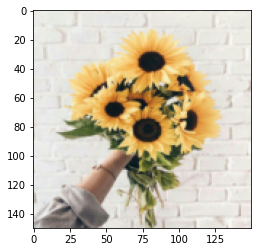

In [32]:
flat_data=[]
url = input('Enter your URL')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out= model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')